# Report
## The Challenge

[image1]: https://user-images.githubusercontent.com/10624937/42135619-d90f2f28-7d12-11e8-8823-82b970a54d7e.gif "Trained Agent"

![Trained Agent][image1]

The challenge is to train an agent to navigate and collect yellow bananas while avoiding blue bananas in a large, square world.

## Theory
### The Idea behind Reinforcement Learning
The following section refers to Sutton, R., and Brato, A., 2018.  
The challenge can be solved through Reinforcement Learning (RL). RL is a machine learning approach where an agent interacts with an environment.
Observing a state the agent tries to maximize an expected cumulative future reward by selecting the next action. Therefore the goal is to find an optimal policy $\pi_*$ which maps an optimal action $a$ to an observed state $s$.
In above described challenge the states are a 37 dimensions space containing the agent's velocity, along with ray-based perception of objects around the agent's forward direction, whereas the actions are given as

- **`0`** - move forward,
- **`1`** - move backward,
- **`2`** - turn left,
- **`3`** - turn right.

Furthermore the environment provides a reward $R$ of +1 when the agent is collecting a yellow banana - a reward of -1 is provided when a blue banana is collected.  

The actions are evaluated with the following eqation:

$q_\pi(s,a) = E_\pi[G_t | S_t = s, A_t = a]$

This is the action-value function, which returns the expected return of an action $a$ in state $s$ at time $t$ when the agent is following the policy $\pi$ for all future time steps. $G_t$ can be rewritten as:

$G_t = R_{t+1} + \gamma v_\pi(S_{t+1})$

Here $R_{t+1}$ is the reward which is provided by the environment at the next time step, $v_\pi(S_{t+1})$ is corresponds to the value of the next state $S_{t+1}$ under the policy $\pi$, $\gamma$ is the discount factor $\in [0,1]$.  

The optimal policy $\pi_*$ is given as:

$\pi_*(s) = argmax_{a \in A(s)} q_*(s,a)$ for all $s \in S$

Finding the optimal policy can be achieved with differend approaches. One is *Q-Learning* which shall be covered in detail below. [Sutton, R., and Brato, A] 


### Q-Learning
The following section refers to Sutton, R., and Brato, A., 2018.  
The idea here is to let an agent interact with the environment starting randomly and continously improve the policy to obtain the optimal policy after numerous interactions.

If we assume that there is only a finite number of states and actions we can write the action-value function $q_\pi$ corresonding to a policy $\pi$ in a so called *Q-table*. This table has one row for each state and one column for each action. 

To let the agent start randomly the action values in the Q-table need to be initialized arbitrarily. The agent will then select an action $A_0$ based on an observed state $S_0$ greedily, which means selecting the action with the maximum value across all possible actions. We call this a *greedy-policy*.

Consequently the agent will receive a reward $R_{t+1}$ from the environment and observe a next state $S_{t+1}$. This can then be applied to update the Q-table as follows:

$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \big(R_{t+1} + \gamma max_{a \in A(S_{t+1})} Q(S_{t+1}, a) - Q(S_t, A_t)\big)$

Here $\alpha$ is the step size of the update and shall be a small positive number usually $\alpha \ll 1$ but at least $\alpha \leq 1$.  
The greedy-policy brings a problem: If one action dominates the others with respect to their action values given a specific state, the algorithm will always select this action when the state is observed. This may lead to a non-optimal policy if rewards are not deterministic. Therefore an *$\epsilon$-greedy-policy* is being introduced:
With a probability of $\epsilon \in [0,1]$ actions are selected randomly - with a probability of $1-\epsilon$ actions are selected greedily. The value of $\epsilon$ is reduced continously to allow a greedier policy with maturing agent. This has the advantage that the agent can explore the interaction with the environment to a higher degree and come up with a better policy eventually.

### Deep Q-Learning
The following section refers to Mnih et al., 2015.  
In Deep Q-Learning artificial neural networks are used as a function approximator to obtain action-values based on an observed state (this called a Deep Q-Network). This has the advantage that large state spaces or even raw pixel data can be used whereas approaches with Q-tables would due to complexity.

#### Experience Replay
There is the effect that a sequence of experience tuples $(S_t, A_t, R_{t+1}, S_{t+1})$ can be highly correlated. As this can negatively effect the learning process, a buffer is used to store experiences. Updates of the Q-Network are then applied on sampled batches of this buffer. This is called experience replay.

The loss function (mean-squared-error) of the update is given as follows:

$L_t(w) = E_\pi \big[ \big(R_{t+1} + \gamma max_{a \in A(S_{t+1})} Q(S_{t+1}, a, w) - Q(S_t, A_t, w) \big)^2\big]$

So the loss is the mean squared difference between the target consisting of the immediate observed return and the value of the next action selected by the greedy policy and the prediction which is the value of an action selected in an $\epsilon$-greedy manner, where the values are given by the current Q-Network.
The following equations gives the following update rule for the Q-Network:

$\Delta w = \alpha \big(R_{t+1} + \gamma max_{a \in A(S_{t+1})} Q(S_{t+1}, a, w) - Q(S_t, A_t, w) \big) \nabla_w Q(S_t, A_t, w)$

#### Fixed Q-Targets
If we take a closer look to the loss function, we can see, that the difference between target and prediction are both dependend on the same Q-Network. This is like chasing a moving target and in contrast to supervised learning, where targets are fixed before learning begins.  
Because of that the weights of the target network are only updated periodically with the weights of the Q-Network. This decouples both networks' weights and reduced correlations between both. The weights of the target network are therefore denoted as $w^-$:

$\Delta w = \alpha \big(R_{t+1} + \gamma max_{a \in A(S_{t+1})} Q(S_{t+1}, a, w^-) - Q(S_t, A_t, w) \big) \nabla_w Q(S_t, A_t, w)$

#### Soft Target-Network updates
As an alternative to periodically replacing the Target Network weights with the ones of the Q-Network, one can apply a soft update after e.g. every step [Li, 2018]. This works as follows:

$w^- \leftarrow \tau w + (1-\tau) w^-$ where $\tau \ll 1$

### Double Deep Q-Learning
The following section refers to [v. Hasselt et al., 2015].  
There is an extension of Deep Q-Learning which is called *Double Deep Q-Learning* and it tackels one inherent problem. If one rearranges the target in the loss function one can see that the same network ist used for both selecting and evaluating the action:

$ R_{t+1} + \gamma max_{a \in A(S_{t+1})} Q(S_{t+1}, a, w) 
= R_{t+1} + \gamma Q \big( S_{t+1}, argmax_{a \in A(S_{t+1})} Q(S_{t+1}, a, w), w \big)$

This makes it more likely that actions are selected which are overestimated. We can simply decouple the selection from the evaluation by making use of an other network similar to the above introduced concept Fixed Q-Targets. We can even use the Target Network. It follows:

$ R_{t+1} + \gamma Q \big( S_{t+1}, argmax_{a \in A(S_{t+1})} Q(S_{t+1}, a, w), w^- \big)$

Now the greedy-policy is used the select the next action for the target, but the Target Network is used for its evaluation.


### Hyperparameters
As usual for machine learning approaches, we need to tune a bunch of hyperparameters:

- Replay Buffer size: amount of experience tuples to be stored in the buffer
- Batch size: size of sample which is used to apply Q-Network update on
- Discount factor
- $\tau$: quantifies soft update, if $\tau=1$, target network weights are simply replaced with Q-Network weights
- $\alpha$: Learning rate / step size for Q-Network update
- Number of steps after Q-Network is updated again:
- Number of steps after Target Network is updated again
- $\epsilon$-greedy-policy: As $\epsilon$ shall be reduced over time, we need to define three values:
    - $\epsilon_{start}$: $\epsilon$ at $t=0$
    - $\epsilon_{end}$: minimum possible $\epsilon$
    - $\epsilon_{decay}$: describes the progress: $\epsilon \leftarrow \epsilon * \epsilon_{decay}$ where $\epsilon_{decay} \in [0,1]$
- The architecture of the Q-Network (number of nodes in the hidden layers)

## The Implementation
No it's time to implement the above described concepts for the Navigation challenge. We will start with initializing both the Unity Environment and the agent. For the initiaization of the agent we need to take a closer look, because we need to define the hyperparameters.

In [1]:
import torch
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
from collections import deque

from agent import Agent
from model import QNetwork

### Initialize Unity Environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`


If the following code cell will be executed successfully a Unity Environment window will open.

In [2]:
# Initialize the environment
env = UnityEnvironment(file_name='Banana_Linux/Banana.x86', worker_id=1)

# Get default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Get state and action spaces
env_info = env.reset(train_mode=True)[brain_name]
state_size = len(env_info.vector_observations[0])
action_size = brain.vector_action_space_size
print('State size:', state_size)
print('Action size:', action_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


State size: 37
Action size: 4


### Hyperparameters
If you take a look the in agent.py file you can see which arguments are required and which default values are given. The default values are following [Mnih et al., 2015].  
Besides the state and the action sizes which are given by the environment we need to specify the number of nodes in the hidden layers. Let's initialize an agent with 256, 128 and 64 nodes in the hidden layers.

In [3]:
agent1 = Agent(state_size, action_size, hidden_layers=[256, 128, 64])
agent1.get_info()


            Replay Buffer size: 1000000 

            Batch size: 32 

            Discout factor: 0.99 

            tau: 1 

            Learning Rate: 0.00025 

            Update local network after every 4 steps 

            Update target network with local network parameters after every 10000 steps 

            DDQN: False
        


Let's train an agent with these hyperparameters to obtain a baseline. Afterwards I will tweek a few of them to see the effects. Besides above printed hyperparamters we also need to specify the parameters which handle the $\epsilon$-greedy-polcy. To follow [Mnih et al., 2015] is specified $\epsilon_{start}=1$ and $\epsilon_{end}=0.1$. To get a better feeling about $\epsilon_{decay}$ let's calculate the number of episodes it takes until $\epsilon=\epsilon_{end}$ 

In [4]:
import math

In [5]:
print(math.log(0.1, 0.9))
print(math.log(0.1, 0.99))
print(math.log(0.1, 0.999))

21.854345326782834
229.1052882766942
2301.4336084694537


Let's start with $\epsilon_{decay}=0.99$, as the decay of the other two options seams to be too short and too long, respectively.

What about the other hyperparameters? I played a lot with those and came up with the following understanding:  
1. Both replay buffer size and batch size don't seem to be to critical for the success of the agent to solve the environment in very few epsiodes. As long as the replay buffer is big enough to avoid correlated experience tuples you should be fine. The same applies for the batch size. Don't use sample sizes which are too small. This will cause Q-Network updates which aren't robust.  
2. Discount factor: As it is irrelevant at which time step in an episode the agent is collecting a banana, the discount factor should be 1
3. The learning rate seams to be one of the most critical hyperparameters. If the learning rate is too large the update steps for the Q-Network are too big which will lead to unstable learning. It might be the case that the global optimum is never met. On the other hand if the learning rate is to small it takes ages until the agent is trained. Having a learning rate of 0.00025 worked quite well for me.
4. Update local network after every x steps: Should be a small integer. If it is too high Q-Network is updated all too rarely.
5. $\tau$ and update target network after every x steps: These two hyperparameters should be strongly coupled. One should decided whether to apply a soft update or not. If so, $\tau$ has to be a small number positive number and the target network should be update at the same frequency as the Q-Network. But if no soft update shall be applied $\tau=1$. Therefore the target shall be only updated after much rarer to avoid chasing a moving target as decribed in the Fixed Q-Target section.
6. The architecture of the Q-Network: The network should be big enough to work as a function approximator, in other words to be able to extract features in the states space and allocate the action values to those. Having 256, 128 and 64 nodes in the hidden layers worked well for me. There might be better networks but small changes in the network are seem to be uncritical for the performance of the agent.

### Training the agent
The following function will train the agent the agent through interaction with the environment. The scores (cumulated reward of an epsiode) are monitored. If the average score of the last 100 episodes $\geq 13$ the training will be terminated and the weights of the Q-Network are saved in the `checkpoint.pth` file.

In [6]:
def dqn(env, brain_name, 
        agent, n_episodes=2000,
        epsilon_start=1.0, epsilon_end=.1, 
        epsilon_decay=.99):
    """Deep Q-Learning.

    Params
    ======
        env: unity environment object
        brain_name (string): brain name of initialized environment
        agent: initialized agent object
        n_episodes (int): maximum number of training episodes
        epsilon_start (float): starting value of epsilon, for epsilon-greedy action selection
        epsilon_end (float): minimum value of epsilon
        epsilon_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """

    scores = []
    scores_window = deque(maxlen=100)
    epsilon = epsilon_start
    for e in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        while True:
            action = agent.act(state, epsilon)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            score += reward
            state = next_state
            if done:
                break

        # Relative score
        scores_window.append(score)
        scores.append(score)

        # Update epsilon
        epsilon = max(epsilon_end, epsilon_decay*epsilon)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_window)), end="")
        if e % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e-100, np.mean(scores_window)))
            checkpoint = {'state_size': state_size,
                          'action_size': action_size,
                          'hidden_layers': [each.out_features for each in agent.qnet_local.hidden_layers],
                          'state_dict': agent.qnet_local.state_dict()}
            torch.save(checkpoint, 'checkpoint.pth')
            break
    return scores

In [7]:
def plot_scores(scores_dict):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for key, scores in scores_dict.items():
        scores_smoothed = gaussian_filter1d(scores, sigma=5)
        plt.plot(np.arange(len(scores)), scores_smoothed, label=key)
    plt.ylabel('smoothed Score')
    plt.xlabel('Episode #')
    plt.legend()
    plt.show()

In the next cells I will initialize four different agents and train them. Applying either soft update and Double Q-Learning or not makes the difference.

In [8]:
hidden_layers = [256, 128, 64]
tau_soft = 1e-3
update_target_soft = 4
gamma = 1

agent1 = Agent(state_size, action_size, hidden_layers, gamma=gamma)
agent2 = Agent(state_size, action_size, hidden_layers, gamma=gamma, 
               tau=tau_soft, update_target=update_target_soft)
agent3 = Agent(state_size, action_size, hidden_layers, gamma=gamma, 
               ddqn=True)
agent4 = Agent(state_size, action_size, hidden_layers, gamma=gamma, 
               tau=tau_soft, update_target=update_target_soft, ddqn=True)

In [9]:
n = 2000
print('DQN')
scores_dqn = dqn(env, brain_name, agent1, n_episodes=n)

print('\nDQN, soft update')
scores_dqn_soft_update = dqn(env, brain_name, agent2, n_episodes=n)

print('\nDDQN')
scores_ddqn = dqn(env, brain_name, agent3, n_episodes=n)

print('\nDDQN, soft update')
scores_ddqn_soft_update = dqn(env, brain_name, agent4, n_episodes=n)

DQN
Episode 100	Average Score: 1.12
Episode 200	Average Score: 5.26
Episode 300	Average Score: 8.06
Episode 400	Average Score: 10.84
Episode 500	Average Score: 10.82
Episode 596	Average Score: 13.01
Environment solved in 496 episodes!	Average Score: 13.01

DQN, soft update
Episode 100	Average Score: 2.52
Episode 200	Average Score: 7.80
Episode 300	Average Score: 9.48
Episode 400	Average Score: 11.66
Episode 500	Average Score: 12.69
Episode 561	Average Score: 13.01
Environment solved in 461 episodes!	Average Score: 13.01

DDQN
Episode 100	Average Score: 0.17
Episode 200	Average Score: 2.93
Episode 300	Average Score: 6.50
Episode 400	Average Score: 8.78
Episode 500	Average Score: 10.67
Episode 600	Average Score: 10.99
Episode 700	Average Score: 12.36
Episode 800	Average Score: 12.60
Episode 812	Average Score: 13.02
Environment solved in 712 episodes!	Average Score: 13.02

DDQN, soft update
Episode 100	Average Score: 1.91
Episode 200	Average Score: 6.63
Episode 300	Average Score: 10.64
Ep

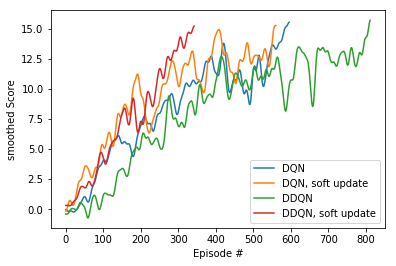

In [10]:
plot_scores({'DQN': scores_dqn,
             'DQN, soft update': scores_dqn_soft_update,
             'DDQN': scores_ddqn,
             'DDQN, soft update': scores_ddqn_soft_update})

As shown in the plot, the Double Deep Q-Learning algorithm with soft updates outperformes all other algorithms. But one single application of these algorithms don't allow a clear answer which algorithm is the best choice. I'd recommend to test performances with different seeds and let the agent learn for longer period, to find out which algorithm will come up with a higher score.

### Watch how the RL agent is acting in the environment

In [11]:
def load_checkpoints(filepath):
    checkpoint = torch.load(filepath)
    model = QNetwork(checkpoint['state_size'],
                     checkpoint['action_size'],
                     checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    return model

def apply(env, brain_name, filepath):
    model = load_checkpoints(filepath)
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    score = 0
    while True:
        state = torch.from_numpy(state).float().unsqueeze(0).to('cpu')
        model.eval()
        with torch.no_grad():
            action_values = model(state)
        action = np.argmax(action_values.cpu().data.numpy())
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        score += reward
        state = next_state
        if done:
            break
    print('Score: {}'.format(score))
    
apply(env, brain_name, 'checkpoint.pth')

Score: 17.0


In [12]:
# Close environment
env.close()

Amazing, right? Could you see how the agent is collecting yellow bananas while it is avoiding blue ones?

## Further potentials to improve the agent
In this section I'd like to introduce one extension of the learning algoirthm described above.

### Prioritized Experience Replay
The following section refers to [Schaul et al., 2016]. 
So far experience tuples are stored in a limited replay buffer and then batches are sampled to learn from. This brings to issues: As we are sampling uniformely, experiences which are rare but maybe are important have a very limited change of being sampled. As the buffer is limited in its size old experiences may get lost.  
Prioritized Experience Replay tries to tackle these problems by defining a criteria which describes the priority of each tuple:

$\delta_t = R_{t+1} + \gamma max_{a \in A(S_{t+1})} Q(S_{t+1}, a, w) - Q(S_t, A_t, w) $

This is the error in the loss function which is used for the update of the Q-Network. The absolute error $|\delta_t|$ can be then used as a priority for sampling this tuple, so that

$P(i) = \frac{|\delta_i|}{\sum\limits_{k=1}^n |\delta_k|} $

is the probability to sample the $i$-th tuple.  

This leads to two furhter issues. First, if the error of a tuple is (close to) zero, the probability of picking this tuple is also (close to) zero. To avoid this we can add a small constant value $e$ to every priority value. Second, using only priorities for sampling may bring the effect of overfitting on a small subset of tuples that are sampled again and again. To tackle this problem another hyperparameter $a \in [0,1]$ is introduced which allows random sampling up to a specific degree. The probability to sample the $i$-th tuple is now given as:

$P(i) = \frac{(|\delta_i| + e)^a}{\sum\limits_{k=1}^n (|\delta_k| + e)^a} $

If $a=0$, tuples are sampled uniformly, if $a=1$ tuples are sampled according to priorities.  

As a last step we need to adjust the update rule to avoid that the action values are biased to the priorities which are used for sampling. Therefore *importance-sampling weights* are introduced:

$ w_i = \big( \frac{1}{N P(i)} \big)^{\beta}$

Here $N$ is the size of the replay buffer and $\beta \in [0,1]$ is used to control the amount of compensation. If $\beta = 1$, importance-sampling weights fully compensate for non-uniform probabilities $P(i)$. Applying these weights will change the update rule as follows:

$\Delta w_i = \alpha \big( \frac{1}{N P(i)}\big)^{\beta} \delta_i \nabla_w Q(S_t, A_t, w)$

## References
- Mnih,  V.,  Kavukcuoglu,  K.,  Silver,  D.,  Rusu,  A. A.,  Veness, J., Bellemare, M. G., Graves, A., Riedmiller, M., Fidjeland, A. K., Ostrovski, G., Petersen, S., Beattie, C., Sadik, A., Antonoglou, I., King, H., Kumaran, D., Wierstra, D., Legg, S., and Hassabis, D.  Human-level control through deep reinforcement learning. Nature,  518 (7540):529–533, 2015.
- van Hasselt, H., Guez, A., and Silver, D.  Deep reinforcement  learning  with  double  Q-learning. arXiv  preprint arXiv:1509.06461, 2015.
- Sutton, R., and Brato, A., Reinforcement Learning. An Introduction (MIT Press, 2018)
- Li, Y., Deep Reinforcement Learning: An Overview. arXiv:1701.07274v6, 2018
- Schaul, T., Quan, J., Antonoglou, I., and Silver D. Prioritized Experience Replay. arXiv:1511.05952, 2016